In [13]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as F


In [15]:
torch.manual_seed(1)


In [16]:
def fetch_data(train_size, test_size):
    # Load training dataset
    train_data = datasets.MNIST('data', train=True, download=True,
                                 transform=transforms.Compose([
                                     transforms.Resize((32, 32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.1307,), (0.3081,))
                                 ]))
    # Assign random target values
    random_targets = torch.tensor(np.random.randint(0, 10, (len(train_data),)))
    train_data.targets = random_targets
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=train_size, shuffle=True)

    # Load test dataset
    test_data = datasets.MNIST('data', train=False,
                                transform=transforms.Compose([
                                    transforms.Resize((32, 32)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                ]))
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=test_size, shuffle=True)

    return train_loader, test_loader


In [17]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [18]:
train_batch_size = 100
test_batch_size = 100
train_loader, test_loader = fetch_data(train_batch_size, test_batch_size)

In [20]:
def training_step(model, optimizer, data_loader):
    model.train()
    total_loss = 0
    correct_predictions = 0

    for batch_index, (data, target) in enumerate(data_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward pass
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predictions = output.argmax(dim=1)
        correct_predictions += (predictions == target).sum().item()

    average_loss = total_loss / len(data_loader.dataset)
    accuracy = 100. * correct_predictions / len(data_loader.dataset)
    return average_loss, accuracy

In [21]:
def evaluation_step(model, epoch, data_loader):
    model.eval()
    total_loss = 0
    correct_predictions = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = Variable(data), Variable(target)
            output = model(data)
            loss = loss_function(output, target)
            total_loss += loss.item()

            predictions = output.argmax(dim=1)
            correct_predictions += (predictions == target).sum().item()

    average_loss = total_loss / len(data_loader.dataset)
    print(f'\nTest set, Epoch {epoch}, Average loss: {average_loss:.4f}, Accuracy: {correct_predictions}/{len(data_loader.dataset)} ({100. * correct_predictions / len(data_loader.dataset):.0f}%)\n')
    return average_loss

In [23]:
model = SimpleCNN()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_function = nn.CrossEntropyLoss()

training_loss_history = []
testing_loss_history = []

num_epochs = 100
for epoch in range(1, num_epochs + 1):
    train_loss, train_accuracy = training_step(model, optimizer, train_loader)
    training_loss_history.append(train_loss)
    test_loss = evaluation_step(model, epoch, test_loader)
    testing_loss_history.append(test_loss)
    print(f'Epoch: {epoch}, Loss= {train_loss:.4f}')



Test set, Epoch 1, Average loss: 0.0230, Accuracy: 729/10000 (7%)

Epoch: 1, Loss= 0.0230

Test set, Epoch 2, Average loss: 0.0230, Accuracy: 635/10000 (6%)

Epoch: 2, Loss= 0.0230

Test set, Epoch 3, Average loss: 0.0230, Accuracy: 989/10000 (10%)

Epoch: 3, Loss= 0.0230

Test set, Epoch 4, Average loss: 0.0230, Accuracy: 1055/10000 (11%)

Epoch: 4, Loss= 0.0230

Test set, Epoch 5, Average loss: 0.0230, Accuracy: 720/10000 (7%)

Epoch: 5, Loss= 0.0230

Test set, Epoch 6, Average loss: 0.0230, Accuracy: 681/10000 (7%)

Epoch: 6, Loss= 0.0230

Test set, Epoch 7, Average loss: 0.0230, Accuracy: 1064/10000 (11%)

Epoch: 7, Loss= 0.0230

Test set, Epoch 8, Average loss: 0.0230, Accuracy: 1142/10000 (11%)

Epoch: 8, Loss= 0.0230

Test set, Epoch 9, Average loss: 0.0230, Accuracy: 1208/10000 (12%)

Epoch: 9, Loss= 0.0230

Test set, Epoch 10, Average loss: 0.0230, Accuracy: 1325/10000 (13%)

Epoch: 10, Loss= 0.0230

Test set, Epoch 11, Average loss: 0.0229, Accuracy: 1238/10000 (12%)

Epoch:

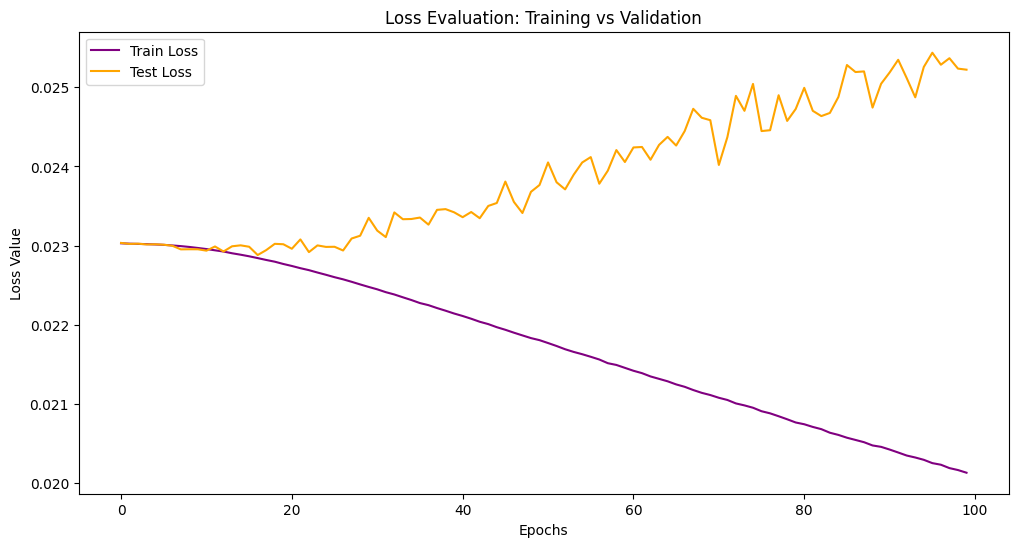

In [25]:
# Plotting the loss comparison
plt.figure(figsize=(12, 6))
plt.plot(np.arange(num_epochs), training_loss_history, color="purple", label='Train Loss')
plt.plot(np.arange(num_epochs), testing_loss_history, color="orange", label='Test Loss')
plt.title('Loss Evaluation: Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()
